In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
print(plt.style.available)

plt.style.use('seaborn-talk')
import seaborn as sns

from popylar.rf import gauss2D_logpolar, gauss2D_rot_cart, gauss2D_iso_cart

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [26]:
X, Y = np.meshgrid(np.linspace(-15,15,201), np.linspace(-15,15,201))
vp_compl = X + Y * 1j
ecc = np.abs(vp_compl)
polar = np.angle(vp_compl)


Z = gauss2D_logpolar(ecc, 
                     polar, 
                     mu = [3, 2], 
                     sigma = 0.5, 
                     kappa = 10.0)

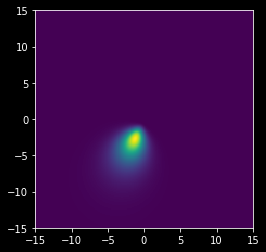

In [27]:
plt.imshow(Z, extent=[X[0,0], X[-1,-1], Y[0,0], Y[-1,-1]])

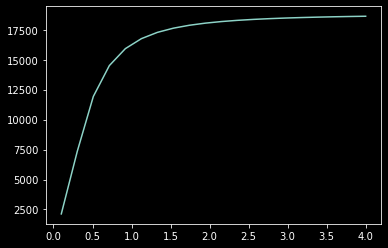

In [9]:
sigmas = np.linspace(0.1,4,20)
sums = [gauss2D_logpolar(ecc, 
                     polar, 
                     mu = [8, 0], 
                     sigma = sigma, 
                     kappa = 1.0).sum() for sigma in sigmas]
plt.plot(sigmas, sums)

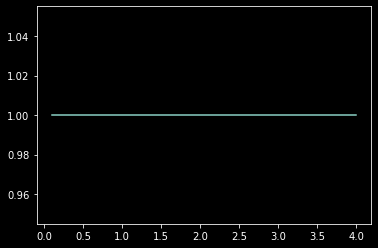

In [31]:
sigmas = np.linspace(0.1,4,20)
sums = [gauss2D_rot_cart(x=X, 
                     y=Y, 
                     mu = [3, 4], 
                     sigma = sigma,
                     theta = 0.0,
                     ar = 2.0).sum() for sigma in sigmas]
plt.plot(sigmas, sums)

[DeviceArray(0.99999994, dtype=float32),
 DeviceArray(1.0000004, dtype=float32),
 DeviceArray(0.9999995, dtype=float32),
 DeviceArray(1.0000001, dtype=float32),
 DeviceArray(0.99999934, dtype=float32),
 DeviceArray(0.9999998, dtype=float32),
 DeviceArray(0.99999917, dtype=float32),
 DeviceArray(1., dtype=float32),
 DeviceArray(1.0000001, dtype=float32),
 DeviceArray(1.0000001, dtype=float32),
 DeviceArray(1.0000001, dtype=float32),
 DeviceArray(1.0000005, dtype=float32),
 DeviceArray(0.99999964, dtype=float32),
 DeviceArray(1.0000001, dtype=float32),
 DeviceArray(0.9999999, dtype=float32),
 DeviceArray(1.0000004, dtype=float32),
 DeviceArray(0.99999976, dtype=float32),
 DeviceArray(1.0000004, dtype=float32),
 DeviceArray(0.9999994, dtype=float32),
 DeviceArray(0.99999964, dtype=float32)]

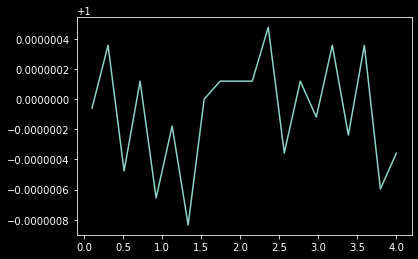

In [36]:
sigmas = np.linspace(0.1,4,20)
sums = [gauss2D_iso_cart(x=X, 
                     y=Y, 
                     mu = [3, 4], 
                     sigma = sigma).sum() for sigma in sigmas]
plt.plot(sigmas, sums)
sums

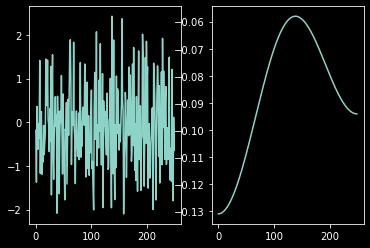

In [56]:
from scipy.fft import dct, idct

signal = np.random.randn(250)
f, ss = plt.subplots(1,2)

ss[0].plot(signal)
modes = dct(signal, norm='ortho', axis=-1)
modes[3:] = 0
lp_signal = idct(modes, norm='ortho', axis=-1)
ss[1].plot(lp_signal)

In [3]:
type(np.float32)

type

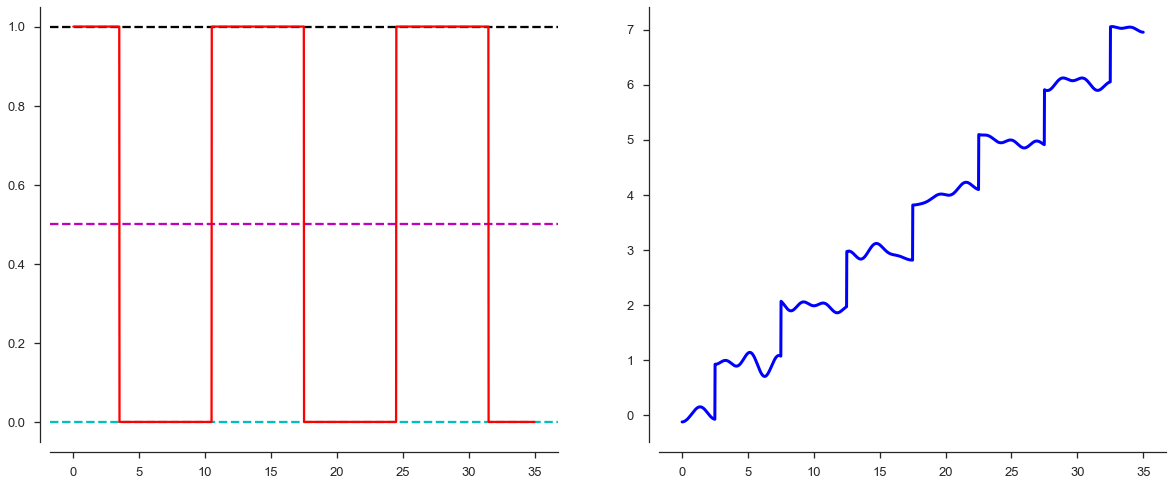

In [33]:
import numpy as np
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-ticks')

f, sbps = plt.subplots(1,2,figsize=(20,8))
sbps[0].axhline(0, c='c', ls='--')
sbps[0].axhline(0.5, c='m', ls='--')
sbps[0].axhline(1, c='k', ls='--')

x = np.linspace(0,35,2000)
sbps[0].plot(x,(np.round((1+np.cos(np.linspace(0,5*np.pi,2000)))/2)), 'r')
# sns.despine(offset=10)
y = np.round(x/5)
noise = np.random.randn(x.shape[0])
modes = dct(noise, norm='ortho', axis=-1)
modes[40:] = 0
lp_signal = idct(modes, norm='ortho', axis=-1)

y += lp_signal
sbps[1].plot(x, y, 'b', lw=3)
sns.despine(offset=10, fig=f)
plt.savefig('belasting-belastbaarheid.pdf')